In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train =pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

## EDA

In [4]:
data_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
data_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [6]:
data_train.shape

(1117957, 22)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [8]:
print(data_train.isnull().sum())

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


## there are no Null Values

In [9]:
data_train.duplicated().sum()

0

# no duplicate values

In [10]:
data_train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [11]:
catigorical_features = data_train.select_dtypes(include="object").columns
numerical_features  = data_train.select_dtypes(exclude="object").columns

In [12]:
catigorical_features

Index([], dtype='object')

In [13]:
numerical_features

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

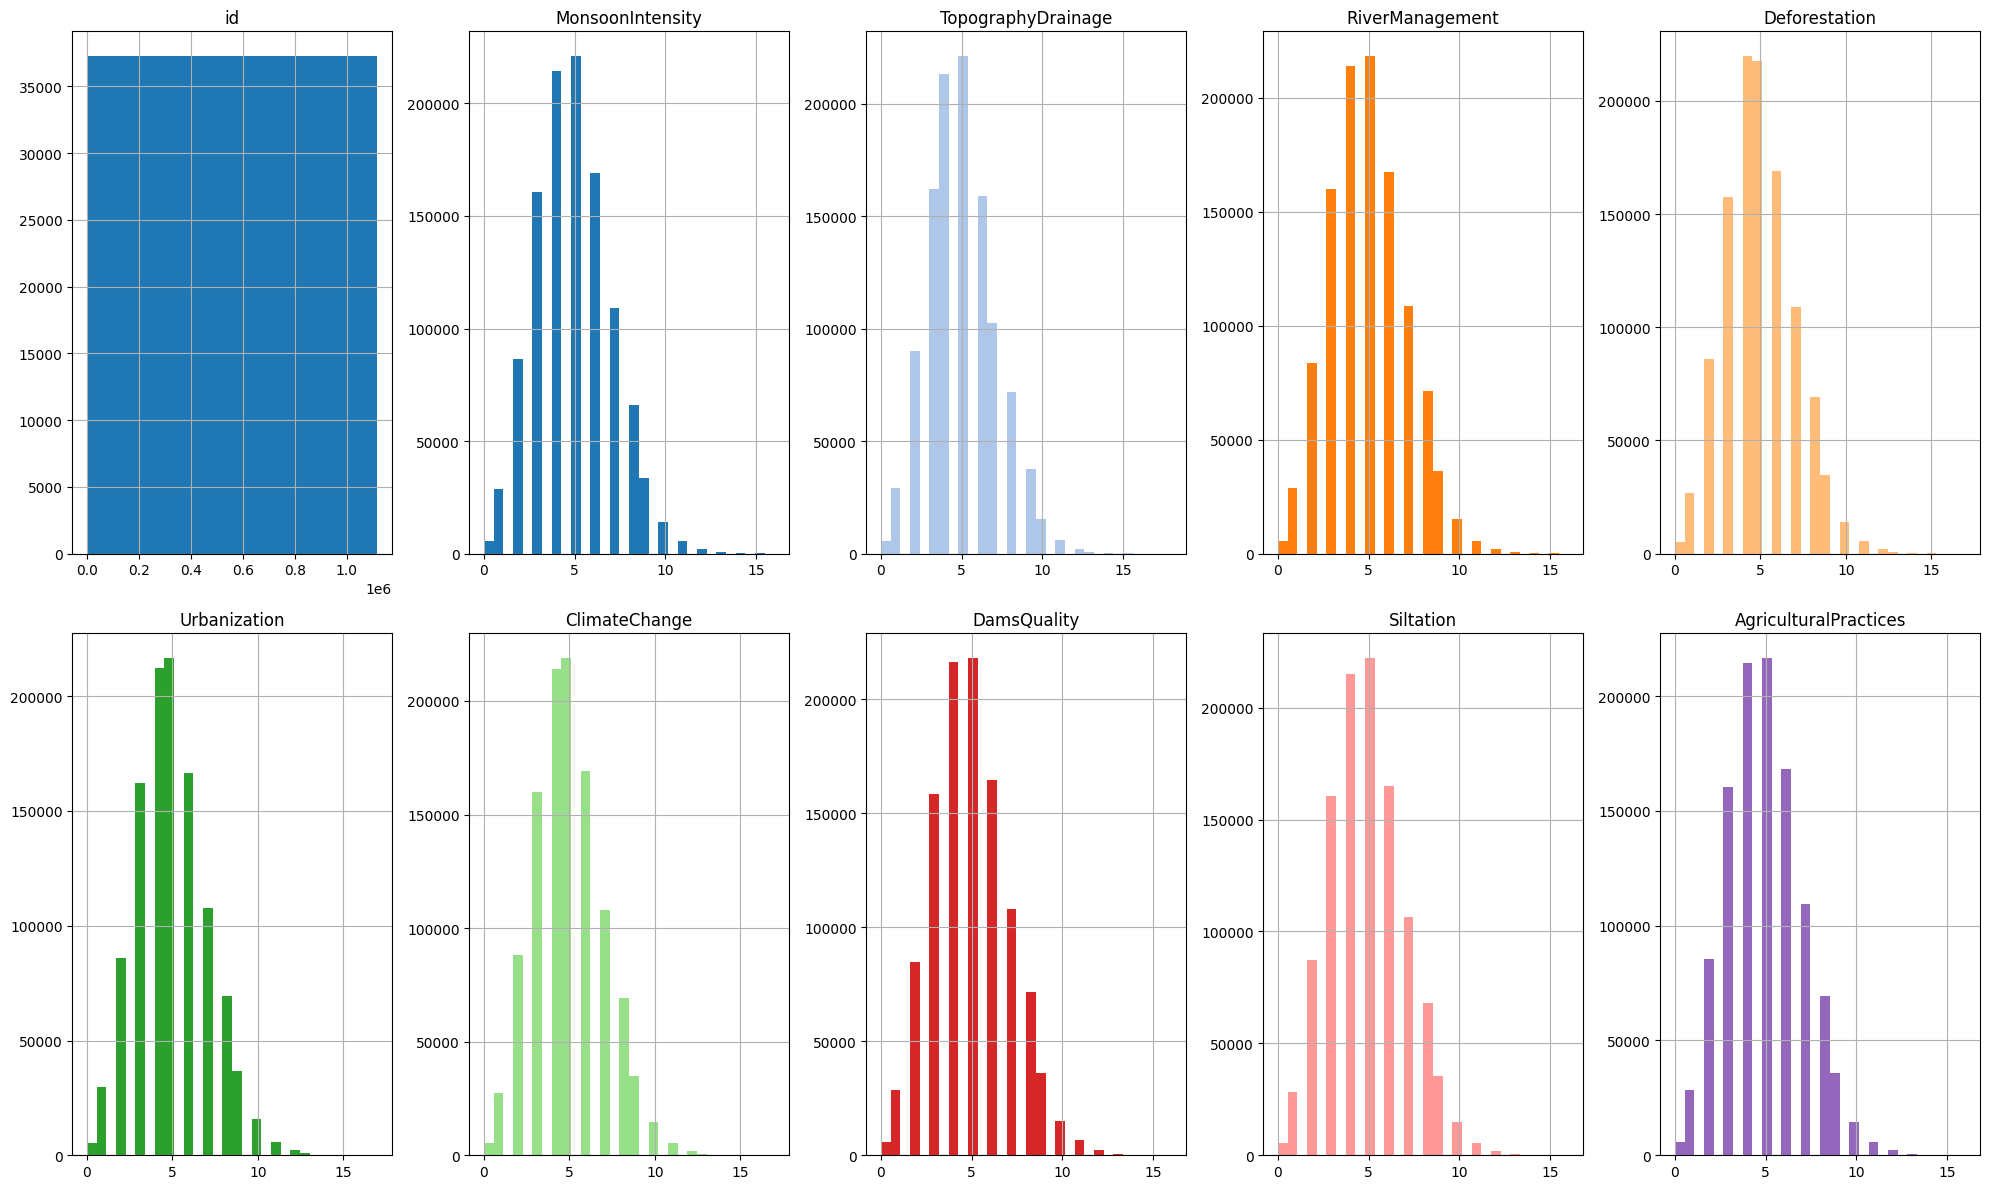

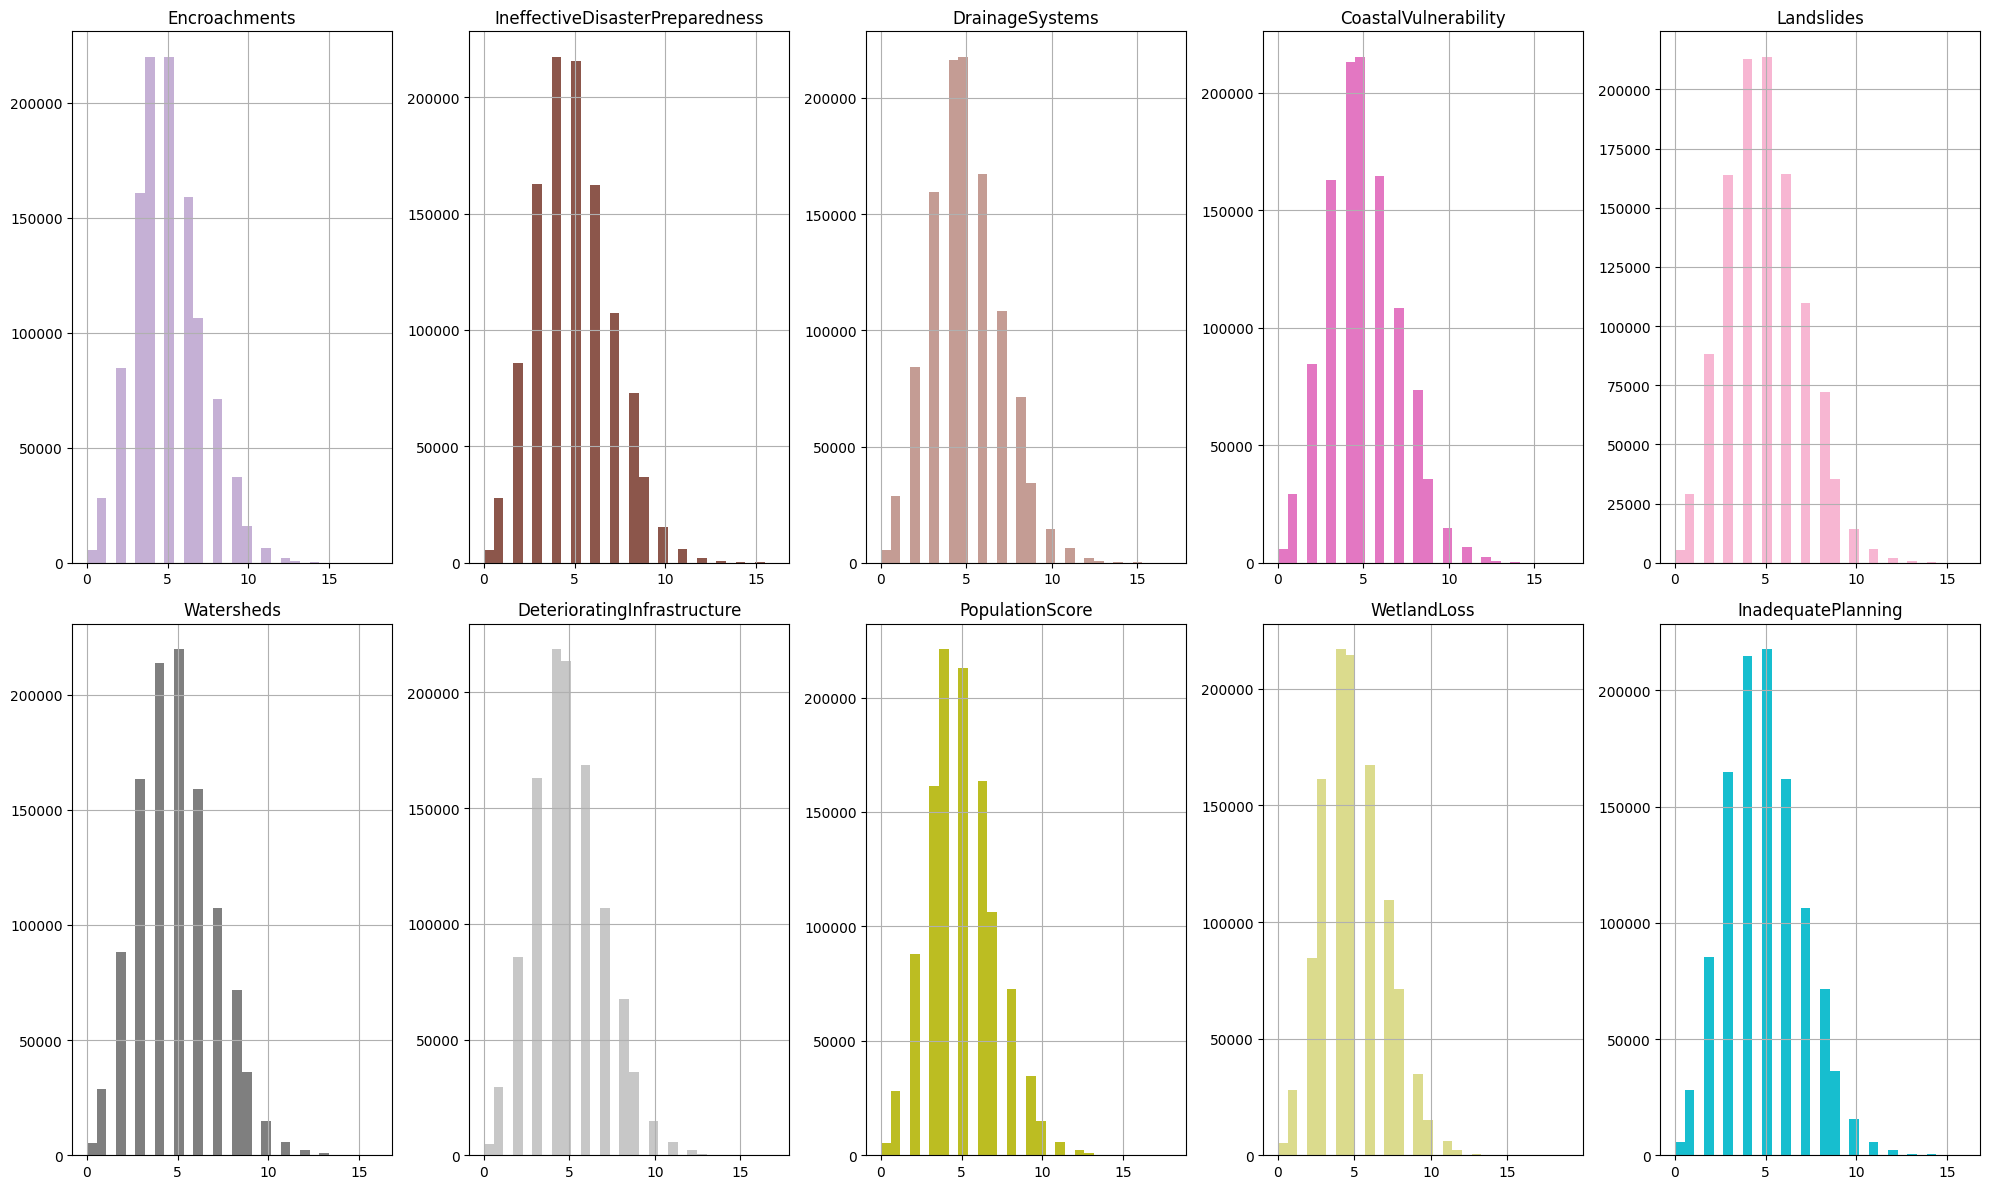

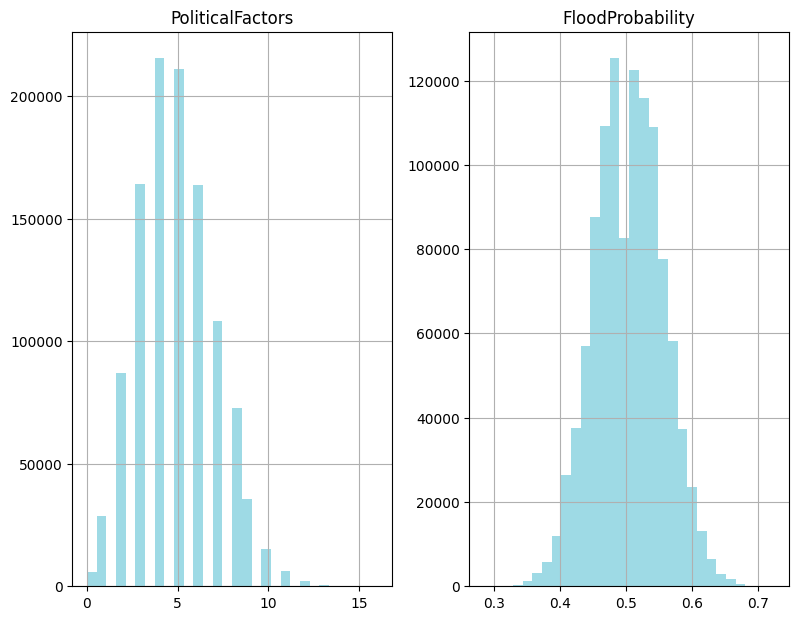

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot colorful histograms in batches
def plot_histograms_in_batches(data_train, batch_size=10):
    columns = data_train.columns
    num_columns = len(columns)
    colors = plt.cm.tab20(np.linspace(0, 1, num_columns))  # Use a colormap for colors
    
    for i in range(0, num_columns, batch_size):
        plt.figure(figsize=(20, 12))
        for j, column in enumerate(columns[i:i + batch_size]):
            plt.subplot(2, (batch_size + 1) // 2, j + 1)
            data_train[column].hist(bins=30, color=colors[i + j % len(colors)])  # Assign color
            plt.title(column)
        plt.tight_layout()
        plt.show()

# Example usage
plot_histograms_in_batches(data_train, batch_size=10)


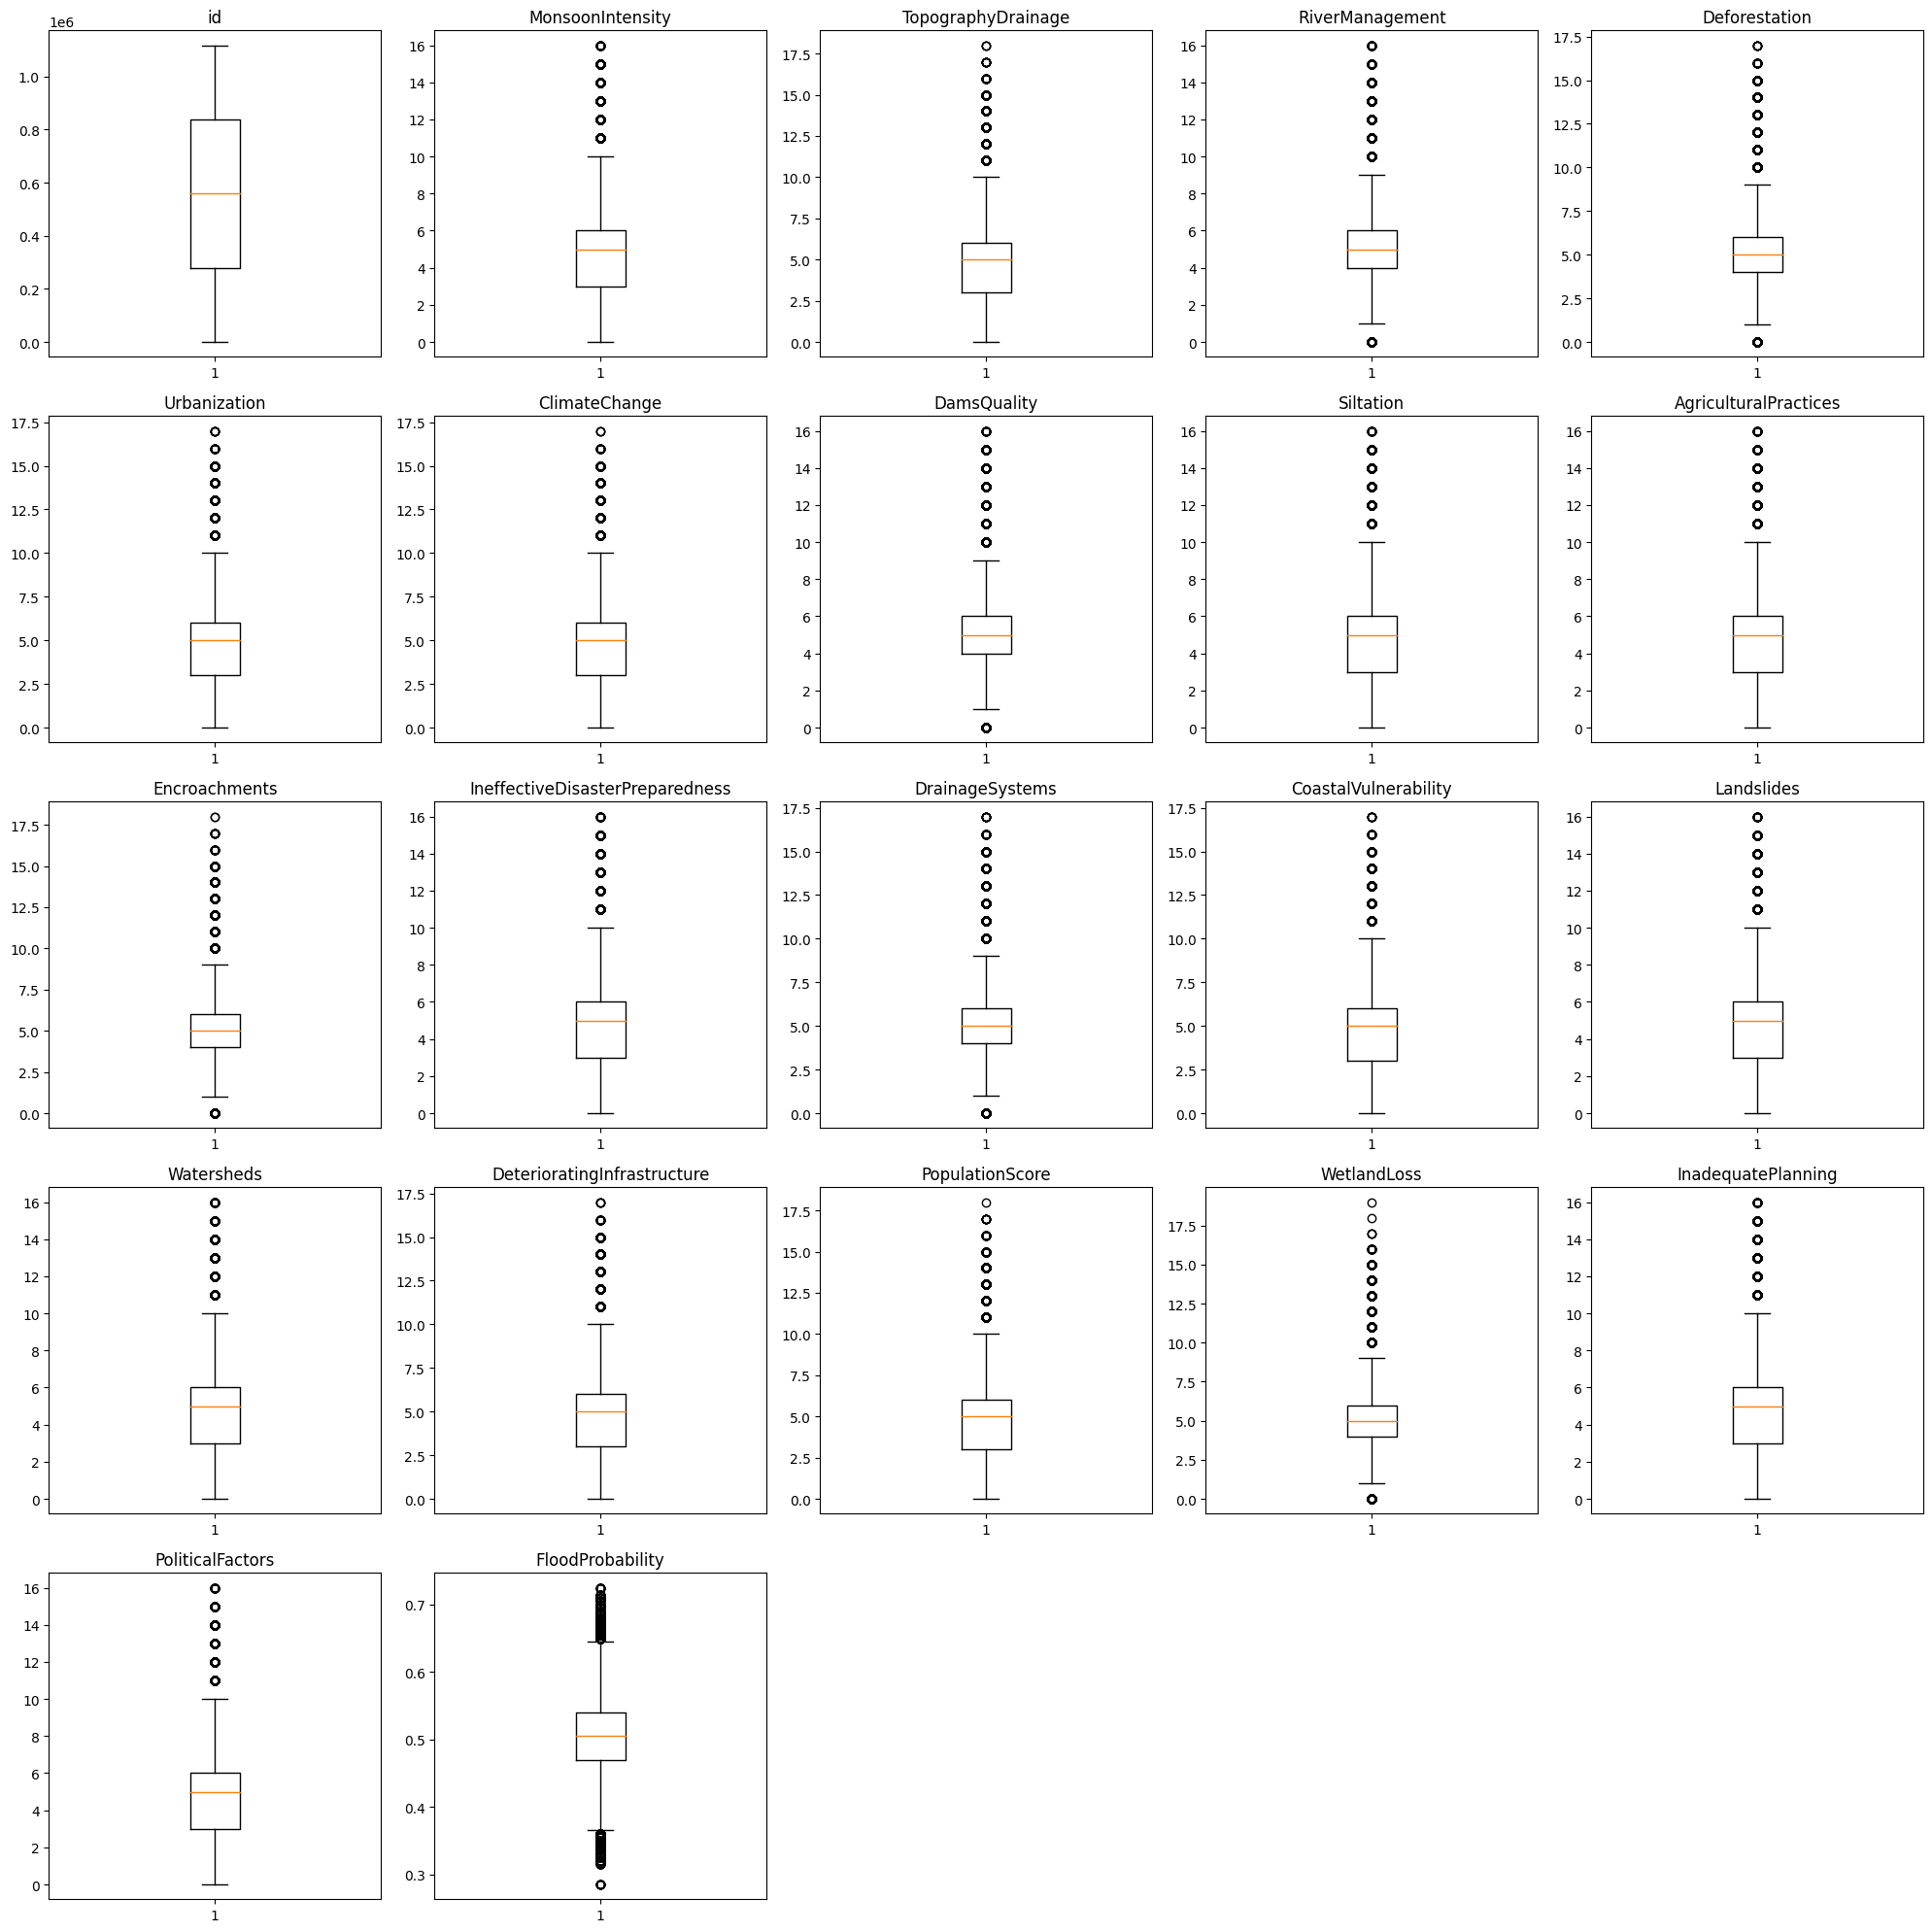

In [15]:
import math

num_cols_per_row = 5 
num_rows = math.ceil(len(numerical_features) / num_cols_per_row)

# Create the figure and subplots
plt.figure(figsize=(20, num_rows * 4))  # Adjust the figure size as needed

# Iterate over the numerical columns and create a box plot for each column
for i, column in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols_per_row, i)  # Multiple rows layout
    plt.boxplot(data_train[column])
    plt.title(column)

plt.tight_layout()

plt.show()


<Axes: >

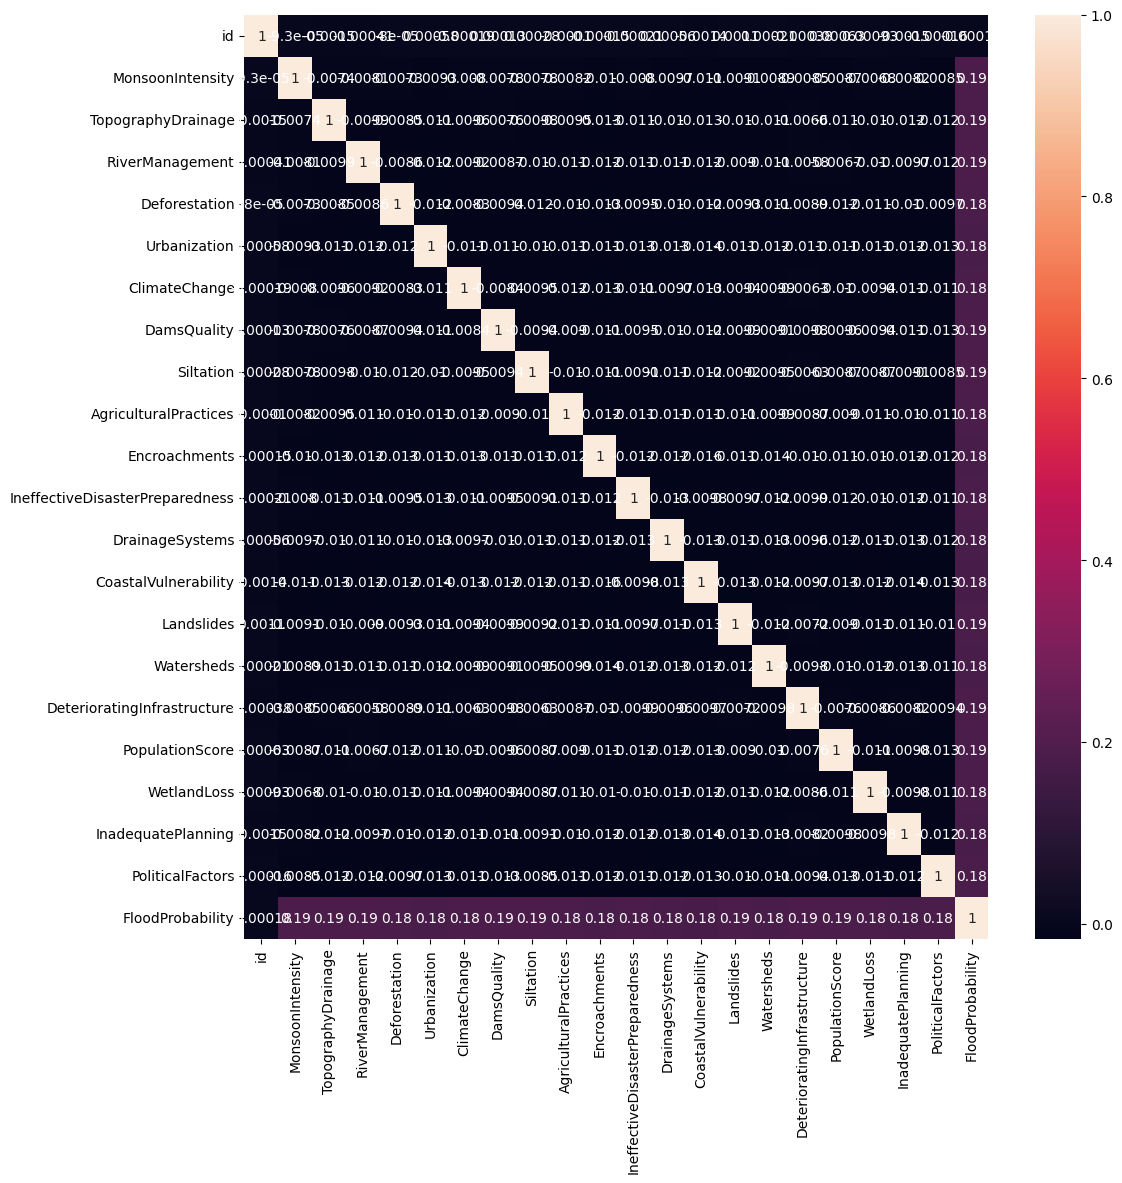

In [16]:
plt.rcParams['figure.figsize']=(12,12)
sns.heatmap(data_train.corr(), annot=True)

In [17]:
import numpy as np

def remove_outliers_iqr(data_train, threshold=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data_train, 25, axis=0)
    Q3 = np.percentile(data_train, 75, axis=0)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identify outliers
    outliers_mask = (data_train < lower_bound) | (data_train > upper_bound)
    
    # Remove outliers
    cleaned_data = data_train[~outliers_mask.any(axis=1)]
    
    return cleaned_data

# Apply outlier removal to data_train using the IQR method
cleaned_data_train = remove_outliers_iqr(data_train)

In [18]:
cleaned_data_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


## DataFrame Split

#Split Dataframe to X and y

#Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “satisfaction” column.

In [19]:
from sklearn.model_selection import train_test_split
X = cleaned_data_train.drop(['FloodProbability'], axis=1)
y = cleaned_data_train['FloodProbability']

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=36)
X_train.shape, X_test.shape

((634414, 21), (211472, 21))

## Model Selection

In [22]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Initialize regression models
linear_regression = LinearRegression()
random_forest_regressor = RandomForestRegressor()
#svm_regressor = SVR()  # It is taking lots of time as dataset is huge
xgboost_regressor = XGBRegressor()
#catboost_regressor = CatBoostRegressor()  it will take 1000 iterations 

# List of all regression models
regression_models = [linear_regression,  
                     random_forest_regressor, 
                    xgboost_regressor
                    ]

# Iterate over each regression model
for model in regression_models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {model.__class__.__name__}")
    print(f"Root Mean Squared Error: {rmse}\n")


Model: LinearRegression
Root Mean Squared Error: 0.02021871916527564

Model: RandomForestRegressor
Root Mean Squared Error: 0.029238658594222453

Model: XGBRegressor
Root Mean Squared Error: 0.022160426555845464



## Here we will select LinearRegression Model

## Now we will make Predictions on test dataset provided to us

In [23]:
data_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [24]:
data_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [25]:
x_target = data_test

In [26]:
x_target.shape

(745305, 21)

In [27]:
outputs = linear_regression.predict(x_target)
data_output = pd.DataFrame(outputs , columns =  ["FloodProbability"])
data_output

,FloodProbability
0,69.672355
1,68.509473
2,68.448937
3,68.608591
4,68.641890
...,...
745300,111.191196
745301,110.877601
745302,112.550002
745303,111.907395


In [28]:
id = data_test[["id"]]
id

,id
0,1117957
1,1117958
2,1117959
3,1117960
4,1117961
...,...
745300,1863257
745301,1863258
745302,1863259
745303,1863260


In [29]:
data_output = pd.concat([id, data_output], axis=1)
data_output

,id,FloodProbability
0,1117957,69.672355
1,1117958,68.509473
2,1117959,68.448937
3,1117960,68.608591
4,1117961,68.641890
...,...,...
745300,1863257,111.191196
745301,1863258,110.877601
745302,1863259,112.550002
745303,1863260,111.907395


In [30]:
data_output.to_csv("target outputs.csv")

In [31]:
data_output.to_csv("/kaggle/working/target_outputs.csv", index=False)
